In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import cv2
import keras
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline

Lets Input the data which is loaded in the project

In [189]:
users = pd.read_csv('wine reviews.csv')

Length of the data frame

In [190]:
len(users)

2890

Length of the data frame(rows) is 2890

lets see how many columns or information is given

In [191]:
len(users.columns)

32

32 Columns of data is provided and we need to identify what is the required data that can be used to design our recommendation systems

In [192]:
users.head()

,id,asins,brand,categories,dateAdded,dateUpdated,descriptions,dimension,ean,flavors,...,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sizes,sourceURLs,upc,weight
0,AV13ClKCGV-KLJ3akN68,NaN,Gallo,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:11Z,2018-01-10T18:06:28Z,NaN,1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,This a fantastic white wine for any occasion!,My Favorite White Wine,NaN,NaN,Bjh,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,4.9213E+11,1.0 lbs
1,AV13CsvW-jtxr-f38AQO,NaN,Fresh Craft Co.,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:42Z,2018-01-10T05:38:33Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",4.25 in x 4.25 in x 5.25 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,"Tart, not sweet...very refreshing and delicious!",Yum!!,NaN,NaN,Wino,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,83120003441,2.45 lbs
2,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,I was given this wine so it was a delightful s...,A New Favorite!,NaN,NaN,Bama Mom,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs
3,AV13CVI_glJLPUi8O7Po,NaN,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,2018-01-10T05:38:31Z,NaN,3.3 in x 3.3 in x 11.79 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,This is a phenomenal wine and my new favorite ...,"Bold, Flavorful, Aromatic, Delicious",NaN,NaN,Av Dub,NaN,http://redsky.target.com/v1/plp/search?kwr=y&c...,82896001453,3.09 lbs
4,AV13CYL4-jtxr-f37_-t,NaN,Wine Cube153,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:18Z,2018-01-10T18:06:29Z,"[{""dateSeen"":[""2017-12-21T05:43:00.000Z"",""2017...",1.0 in x 1.0 in x 1.0 in,NaN,NaN,...,https://redsky.target.com/groot-domain-api/v1/...,4 750ml bottles for the price of two With way ...,"Yum! Plus, Environmentally Friendly!",Overland Park,NaN,Chelseamay,NaN,https://redsky.target.com/groot-domain-api/v1/...,85200600465,1.0 lbs


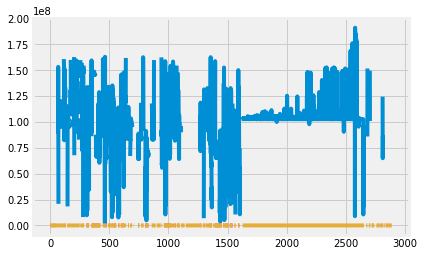

In [193]:
users.plot()
plt.legend().remove()
plt.show()

In [194]:
newDf = users.loc[0:2890,['id','brand','categories','dateAdded','reviews.title','reviews.rating']]
newDf.head()

,id,brand,categories,dateAdded,reviews.title,reviews.rating
0,AV13ClKCGV-KLJ3akN68,Gallo,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:11Z,My Favorite White Wine,5.0
1,AV13CsvW-jtxr-f38AQO,Fresh Craft Co.,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:42Z,Yum!!,5.0
2,AV13CVI_glJLPUi8O7Po,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,A New Favorite!,5.0
3,AV13CVI_glJLPUi8O7Po,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,"Bold, Flavorful, Aromatic, Delicious",5.0
4,AV13CYL4-jtxr-f37_-t,Wine Cube153,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:18Z,"Yum! Plus, Environmentally Friendly!",5.0


In [195]:
newDf.dropna()
newDf.head()

,id,brand,categories,dateAdded,reviews.title,reviews.rating
0,AV13ClKCGV-KLJ3akN68,Gallo,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:11Z,My Favorite White Wine,5.0
1,AV13CsvW-jtxr-f38AQO,Fresh Craft Co.,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:59:42Z,Yum!!,5.0
2,AV13CVI_glJLPUi8O7Po,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,A New Favorite!,5.0
3,AV13CVI_glJLPUi8O7Po,1000 Stories,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:05Z,"Bold, Flavorful, Aromatic, Delicious",5.0
4,AV13CYL4-jtxr-f37_-t,Wine Cube153,"Food & Beverage,Beverages,Wine, Beer & Liquor,...",2017-07-24T23:58:18Z,"Yum! Plus, Environmentally Friendly!",5.0


In [196]:
new_df_relevant = newDf[['id','brand','reviews.rating']]
new_df_relevant

,id,brand,reviews.rating
0,AV13ClKCGV-KLJ3akN68,Gallo,5.0
1,AV13CsvW-jtxr-f38AQO,Fresh Craft Co.,5.0
2,AV13CVI_glJLPUi8O7Po,1000 Stories,5.0
3,AV13CVI_glJLPUi8O7Po,1000 Stories,5.0
4,AV13CYL4-jtxr-f37_-t,Wine Cube153,5.0
5,AV6zq-akYSSHbkXwoEEj,Beck's Na,5.0
6,AV13CmDIglJLPUi8O7gb,Gallo,3.0
7,AV13CmDIglJLPUi8O7gb,Gallo,2.0
8,AV6V57uYKZqtpbFMQNh6,California Roots,5.0
9,AV13CVPUglJLPUi8O7Pw,Charles Charles,5.0


In [197]:
unique_Id = new_df_relevant['id'].unique()

In [198]:
len(unique_Id)

333

In [199]:
unique_wineBrand = new_df_relevant['brand'].unique()
len(unique_wineBrand)

194

#### From the above analysis of data, we can see that the wine brands are less than the number of unique users.
#### which makes clear that there is a similarity between the pattern of interests in wines by the users or the overlap of interest in wines.

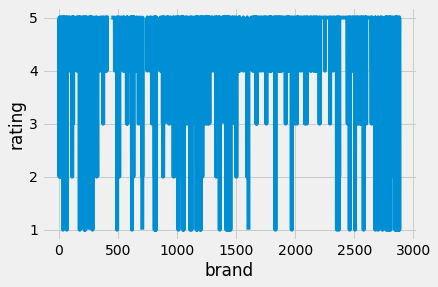

In [200]:
from matplotlib import style
style.use('fivethirtyeight')
new_df_relevant.plot()
plt.xlabel('brand')
plt.ylabel('rating')
plt.legend().remove()
plt.show()

In [201]:
import sklearn
from sklearn.cross_validation import train_test_split

In [202]:
train_data, test_data = train_test_split(new_df_relevant, test_size = 0.20, random_state=0)
print(train_data.head(5))

                        id          brand  reviews.rating
1397  AVpgJjljLJeJML43Jpsd    Great Value             5.0
1984  AVpf-F_EilAPnD_xlTDm         Carmex             5.0
1042  AV6c4DrvHh53nbDR9RcC  Jack Daniel's             5.0
891   AVpi8vkj1cnluZ0-SHb4      Dirty Sue             5.0
2367  AVpf-F_EilAPnD_xlTDm         Carmex             5.0


In [203]:
train_data.tail(6)

,id,brand,reviews.rating
1731,AVpf-F_EilAPnD_xlTDm,Carmex,5.0
763,AVpfS0eZilAPnD_xZBG1,Brand Castle,NaN
835,AVpgaN2XilAPnD_xsDcQ,Great Value,NaN
1653,AVpf-F_EilAPnD_xlTDm,Carmex,5.0
2607,AVpf-F_EilAPnD_xlTDm,Carmex,5.0
2732,AVph19iiLJeJML43fcjQ,NaN,5.0


Looks like there are Nan Values in the data, lets forward fill them so that the data doesnt show any irrelevant break throughs

In [204]:
train_data.fillna(method='ffill',inplace=True)

/Users/pagidoju/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3787: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [205]:
train_data.tail()

,id,brand,reviews.rating
763,AVpfS0eZilAPnD_xZBG1,Brand Castle,5.0
835,AVpgaN2XilAPnD_xsDcQ,Great Value,5.0
1653,AVpf-F_EilAPnD_xlTDm,Carmex,5.0
2607,AVpf-F_EilAPnD_xlTDm,Carmex,5.0
2732,AVph19iiLJeJML43fcjQ,Carmex,5.0


In [206]:
train_data.head(20)

,id,brand,reviews.rating
1397,AVpgJjljLJeJML43Jpsd,Great Value,5.0
1984,AVpf-F_EilAPnD_xlTDm,Carmex,5.0
1042,AV6c4DrvHh53nbDR9RcC,Jack Daniel's,5.0
891,AVpi8vkj1cnluZ0-SHb4,Dirty Sue,5.0
2367,AVpf-F_EilAPnD_xlTDm,Carmex,5.0
2073,AVpf-F_EilAPnD_xlTDm,Carmex,4.0
314,AVpieRqRLJeJML43mBQ9,Master of Mixes,5.0
1239,AVpisFlJ1cnluZ0-Pulr,Bittermens,5.0
37,AV13CYZ0GV-KLJ3akNuV,Wine Cube153,1.0
425,AVpiD1J-1cnluZ0-JYg3,Zing Zang,1.0


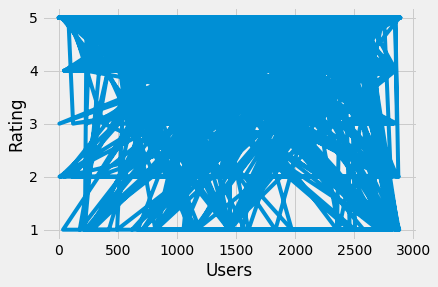

In [207]:
train_data.plot()
plt.legend().remove()
plt.xlabel('Users')
plt.ylabel('Rating')
plt.show()

In [208]:
train_data.head()

,id,brand,reviews.rating
1397,AVpgJjljLJeJML43Jpsd,Great Value,5.0
1984,AVpf-F_EilAPnD_xlTDm,Carmex,5.0
1042,AV6c4DrvHh53nbDR9RcC,Jack Daniel's,5.0
891,AVpi8vkj1cnluZ0-SHb4,Dirty Sue,5.0
2367,AVpf-F_EilAPnD_xlTDm,Carmex,5.0


In [210]:
train_data['reviews.rating'] = np.log(train_data['reviews.rating'])
train_data.head()

/Users/pagidoju/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/Users/pagidoju/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,id,brand,reviews.rating
1397,AVpgJjljLJeJML43Jpsd,Great Value,0.475885
1984,AVpf-F_EilAPnD_xlTDm,Carmex,0.475885
1042,AV6c4DrvHh53nbDR9RcC,Jack Daniel's,0.475885
891,AVpi8vkj1cnluZ0-SHb4,Dirty Sue,0.475885
2367,AVpf-F_EilAPnD_xlTDm,Carmex,0.475885


In [212]:
train_data.tail()

,id,brand,reviews.rating
763,AVpfS0eZilAPnD_xZBG1,Brand Castle,0.475885
835,AVpgaN2XilAPnD_xsDcQ,Great Value,0.475885
1653,AVpf-F_EilAPnD_xlTDm,Carmex,0.475885
2607,AVpf-F_EilAPnD_xlTDm,Carmex,0.475885
2732,AVph19iiLJeJML43fcjQ,Carmex,0.475885


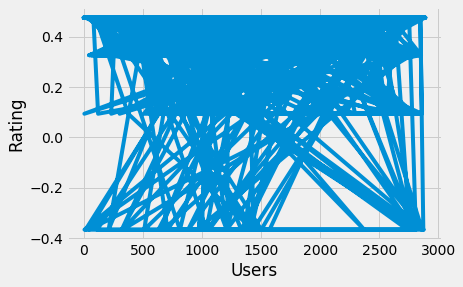

In [213]:
train_data.plot()
plt.legend().remove()
plt.xlabel('Users')
plt.ylabel('Rating')
plt.show()

In [214]:
train_data.columns

Index(['id', 'brand', 'reviews.rating'], dtype='object')

In [217]:
users.columns

Index(['id', 'asins', 'brand', 'categories', 'dateAdded', 'dateUpdated',
       'descriptions', 'dimension', 'ean', 'flavors', 'keys', 'manufacturer',
       'manufacturerNumber', 'name', 'reviews.date', 'reviews.dateAdded',
       'reviews.dateSeen', 'reviews.didPurchase', 'reviews.doRecommend',
       'reviews.id', 'reviews.numHelpful', 'reviews.rating',
       'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'sizes',
       'sourceURLs', 'upc', 'weight'],
      dtype='object')

In [218]:
users['categories'].head()

0    Food & Beverage,Beverages,Wine, Beer & Liquor,...
1    Food & Beverage,Beverages,Wine, Beer & Liquor,...
2    Food & Beverage,Beverages,Wine, Beer & Liquor,...
3    Food & Beverage,Beverages,Wine, Beer & Liquor,...
4    Food & Beverage,Beverages,Wine, Beer & Liquor,...
Name: categories, dtype: object

In [226]:
users['keys']

0                             492130001994,gallo/13312834
1                        freshcraft/50392800,083120003441
2                       082896001453,1000stories/50399893
3                       082896001453,1000stories/50399893
4                       winecube153/14831433,085200600465
5                           082488127004,becksna/13391824
6                             492130016165,gallo/13300260
7                             492130016165,gallo/13300260
8                   085200028856,californiaroots/52525401
9                    856622001112,charlescharles/14895028
10                       fancypants/15207222,085200027699
11                     martinirossi/13429173,492130003080
12                       799705749771,603brewery/51123742
13                       700371994532,603brewery/51123741
14                       700371994532,603brewery/51123741
15                          739958083505,coppola/13307841
16                  085200028863,californiaroots/52525404
17            